```
Copyright 2021 Twitter, Inc.
SPDX-License-Identifier: Apache-2.0
```

## Image Crop Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twitter-research/image-crop-analysis/blob/master/notebooks/Image%20Crop%20Analysis.ipynb)

In [1]:
import logging
import shlex
import subprocess
import sys
from collections import namedtuple
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

logging.basicConfig(level=logging.ERROR)

In [2]:
import platform

BIN_MAPS = {"Darwin": "mac", "Linux": "linux"}

HOME_DIR = Path("../").expanduser()

try:
    import google.colab
    ! pip install pandas scikit-learn scikit-image statsmodels requests dash
    ! [[ -d image-crop-analysis ]] || git clone https://github.com/Vivdaddy/image-crop-analysis
    HOME_DIR = Path("./image-crop-analysis").expanduser()
    IN_COLAB = True
except:
    IN_COLAB = False

sys.path.append(str(HOME_DIR / "src"))
bin_dir = HOME_DIR / Path("./bin")
bin_path = bin_dir / BIN_MAPS[platform.system()] / "candidate_crops"
model_path = bin_dir / "fastgaze.vxm"
data_dir = HOME_DIR / Path("./data/")
data_dir.exists()

True

In [4]:
img_path = next(data_dir.glob("./*.jpeg"))
img_path

PosixPath('../data/abled_14.jpeg')

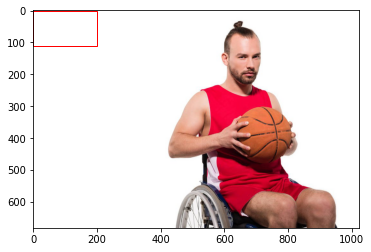

In [29]:
# Dont need to run
img = mpimg.imread(img_path)
plt.imshow(img)
plt.gca().add_patch(
    Rectangle((0, 0), 200, 112, linewidth=1, edgecolor="r", facecolor="none")
)

In [ ]:
# Don't need to run
str(img_path.absolute())

In [5]:
cmd = f"{str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points"
cmd

"../bin/linux/candidate_crops ../bin/fastgaze.vxm '/home/vivek/Documents/Gatech/Research/twitter_challenge/image-crop-analysis/notebooks/../data/abled_14.jpeg' show_all_points"

In [6]:
output = subprocess.check_output(cmd, shell=True)  # Success!
print(output.splitlines())

[b'764 494', b'0 0 1800 1008', b'166 0 1197 1197', b'239 0 1050 1197', b'465 0 599 1197', b'0 0 1800 1197', b'44.9577 44.9577 -0.121505', b'134.873 44.9577 -0.266981', b'224.789 44.9577 -0.288588', b'314.704 44.9577 -0.302195', b'404.62 44.9577 -0.250075', b'494.535 44.9577 -0.138821', b'584.451 44.9577 0.0445704', b'674.366 44.9577 0.322498', b'764.282 44.9577 0.324635', b'854.197 44.9577 0.14261', b'944.113 44.9577 -0.0987797', b'1034.03 44.9577 -0.226996', b'1123.94 44.9577 -0.306086', b'1213.86 44.9577 -0.329053', b'1303.77 44.9577 -0.336387', b'1393.69 44.9577 -0.33606', b'1483.61 44.9577 -0.331379', b'1573.52 44.9577 -0.311239', b'1663.44 44.9577 -0.216978', b'1753.35 44.9577 -0.0939048', b'44.9577 134.873 -0.302076', b'134.873 134.873 -0.498561', b'224.789 134.873 -0.5055', b'314.704 134.873 -0.514035', b'404.62 134.873 -0.399476', b'494.535 134.873 -0.129826', b'584.451 134.873 0.578864', b'674.366 134.873 1.34286', b'764.282 134.873 1.48961', b'854.197 134.873 0.95823', b'944.

In [7]:
! {str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points | head

showAllPoints=true, argv[3]=show_all_points
764 494
0 0 1800 1008
166 0 1197 1197
239 0 1050 1197
465 0 599 1197
0 0 1800 1197
44.9577 44.9577 -0.121505
134.873 44.9577 -0.266981
224.789 44.9577 -0.288588
314.704 44.9577 -0.302195


In [8]:
from crop_api import ImageSaliencyModel, is_symmetric, parse_output, reservoir_sampling

In [9]:
model = ImageSaliencyModel(crop_binary_path=bin_path, crop_model_path=model_path)

In [ ]:
plt.matplotlib.__version__

In [ ]:
list(data_dir.glob("./*.jpeg"))

In [ ]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=3)
plt.savefig("dummy_top3.jpeg", bbox_inches="tight")

## Crop an image generated using combination of images

In [10]:
from PIL import Image

from image_manipulation import join_images
my_num = [str(x) for x in range(1, 51)]
# exclude = [str(x) for x in range(26, 51)]
# my_num = [x for x in my_num if x not in exclude]
my_num

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50']

In [11]:
images = [Image.open(x) for x in data_dir.glob("./*.jpeg")]
img, x_sep, y_sep = join_images(images[:8], col_wrap=2, img_size=(128, -1))

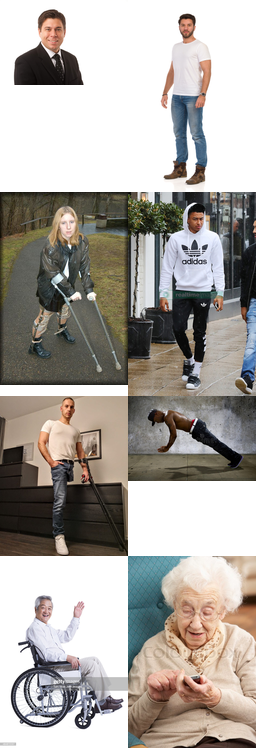

In [12]:
img

In [15]:
from tqdm import tqdm
# Initialize my dictionary
my_results_dict = {}
for num in my_num:
    my_results_dict[num] = {'d_a': '', 'a_d': ''}

# Disabled Abled Horizontal Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./disabled_" + num + ".jpeg")),
        Image.open(data_dir / Path("./abled_" + num + ".jpeg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if x > x_sep:
        my_results_dict[num]['d_a'] = 'a'
    else:
        my_results_dict[num]['d_a'] = 'd'


  0%|          | 0/50 [00:00<?, ?it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
  4%|▍         | 2/50 [00:00<00:03, 15.62it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmp83clljsa
None 256 92
/tmp/tmp0lmgxo7e
None 90 128
/tmp/tmpos_0z563
None 170 128
/tmp/tmptxnb9sq9
None 184 128
showAllPoints=true, argv[3]=show_all_points
  8%|▊         | 4/50 [00:00<00:03, 14.48it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
 12%|█▏        | 6/50 [00:00<00:03, 14.29it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmpu95jd2qr
None 166 128
/tmp/tmpsohnyr9t
None 185 128
/tmp/tmp34xcahtd
None 172 128
showAllPoints=true, argv[3]=show_all_points
 16%|█▌        | 8/50 [00:00<00:02, 14.18it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmpfgfsxaxi
None 177 128
/tmp/tmpagfh1wqm
None 213 128
showAllPoints=true, argv[3]=show_all_points
 20%|██        | 10/50 [00:00<00:03, 12.37it/s]/tmp/tmp6otpyjo_
None 2

In [16]:
# Abled Disabled Horizontal Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./abled_" + num + ".jpeg")),
        Image.open(data_dir / Path("./disabled_" + num + ".jpeg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if x > x_sep:
        my_results_dict[num]['a_d'] = 'd'
    else:
        my_results_dict[num]['a_d'] = 'a'

  0%|          | 0/50 [00:00<?, ?it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
  4%|▍         | 2/50 [00:00<00:03, 15.33it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmp38_k27fv
None 256 92
/tmp/tmp0n21_48e
None 90 128
/tmp/tmpl9so869t
None 170 128
showAllPoints=true, argv[3]=show_all_points
  8%|▊         | 4/50 [00:00<00:03, 14.14it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmplmbk4a1w
None 184 128
/tmp/tmpt_3k_yhp
None 166 128
/tmp/tmpijnxqeog
None 185 128
showAllPoints=true, argv[3]=show_all_points
 12%|█▏        | 6/50 [00:00<00:03, 13.45it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
 16%|█▌        | 8/50 [00:00<00:03, 13.54it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmp3cop9s1c
None 172 128
/tmp/tmpb8yp46hk
None 177 128
/tmp/tmpngwgkq7d
None 213 128
showAllPoints=true, argv[3]=show_all_points
 20%|██        | 10/50 [00:00<00:03, 11.80it/s]/tmp/tmpl4ifh036
None 2

In [21]:
# Find stats here, for horizontal stitching
import copy
count_clearly_abled_ad = 0
count_clearly_disabled_ad = 0
count_confused_ad = 0

for num in my_num:
    if my_results_dict[num]['a_d'] == 'a':
        count_clearly_abled_ad += 1
    elif my_results_dict[num]['a_d'] == 'd':
        count_clearly_disabled_ad += 1
    else:
        count_confused_ad += 1
print("horizontal stitching:")
print("Abled_ Disabled:")
print("disabled", count_clearly_disabled_ad)
print("abled", count_clearly_abled_ad)
print("confused", count_confused_ad)
print("____________________")


count_clearly_abled_da = 0
count_clearly_disabled_da = 0
count_confused_da = 0
for num in my_num:
    if my_results_dict[num]['d_a'] == 'a':
        count_clearly_abled_da += 1
    elif my_results_dict[num]['d_a'] == 'd':
        count_clearly_disabled_da += 1
    else:
        count_confused_da += 1

print("horizontal stitching:")
print("Disabled_Abled:")
print("disabled", count_clearly_disabled_da)
print("abled", count_clearly_abled_da)
print("confused", count_confused_da)
print("____________________")

count_clearly_abled = 0
count_clearly_disabled = 0
count_confused = 0
for num in my_num:
    if my_results_dict[num]['d_a'] == 'a' and my_results_dict[num]['a_d'] == 'a':
        count_clearly_abled += 1
    elif my_results_dict[num]['a_d'] == 'd' and my_results_dict[num]['d_a'] == 'd':
        count_clearly_disabled += 1
    else:
        count_confused += 1

print("Horizontal stitching")
print("Combined")
print("disabled", count_clearly_disabled)
print("abled", count_clearly_abled)
print("confused", count_confused)
print("____________________")

my_results_dict_horizontal = copy.deepcopy(my_results_dict)

horizontal stitching:
Abled_ Disabled:
disabled 20
abled 30
confused 0
____________________
horizontal stitching:
Disabled_Abled:
disabled 21
abled 29
confused 0
____________________
Horizontal stitching
Combined
disabled 20
abled 29
confused 1
____________________


In [22]:
my_results_dict = {}
for num in my_num:
    my_results_dict[num] = {'d_a': '', 'a_d': ''}

# Disabled Abled Vertical Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./disabled_" + num + ".jpeg")),
        Image.open(data_dir / Path("./abled_" + num + ".jpeg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=1, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if y > y_sep:
        my_results_dict[num]['d_a'] = 'a'
    else:
        my_results_dict[num]['d_a'] = 'd'

  0%|          | 0/50 [00:00<?, ?it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
  4%|▍         | 2/50 [00:00<00:02, 16.69it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
/tmp/tmp58nqb0zn
None 128 177
/tmp/tmptn26spbi
None 50 256
/tmp/tmpgwkb066t
None 85 256
/tmp/tmp660z7bnr
None 101 256
showAllPoints=true, argv[3]=show_all_points
 10%|█         | 5/50 [00:00<00:02, 19.44it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
 14%|█▍        | 7/50 [00:00<00:02, 19.52it/s]/tmp/tmpe3ilb1ml
None 86 256
/tmp/tmpx0h8cmvg
None 100 256
/tmp/tmplsim9ctw
None 90 256
/tmp/tmprdyztjfd
None 92 256
showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
 18%|█▊        | 9/50 [00:00<00:02, 18.30it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmp_rberz6k
None 128 256
/tmp/tmp8l6k9zgy
None 128 182
showAllPoints=true, argv[3]=show_all_points

In [23]:
# Abled Disabled Vertical Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./abled_" + num + ".jpeg")),
        Image.open(data_dir / Path("./disabled_" + num + ".jpeg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=1, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if y > y_sep:
        my_results_dict[num]['a_d'] = 'd'
    else:
        my_results_dict[num]['a_d'] = 'a'

  0%|          | 0/50 [00:00<?, ?it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
  4%|▍         | 2/50 [00:00<00:03, 13.97it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmp_7jso2qx
None 128 177
/tmp/tmpw0hchoet
None 50 256
/tmp/tmpkr1fjud2
None 85 256
/tmp/tmpxeaxbedx
None 101 256
showAllPoints=true, argv[3]=show_all_points
  8%|▊         | 4/50 [00:00<00:02, 16.65it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
 14%|█▍        | 7/50 [00:00<00:02, 19.02it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmplgpjc_h9
None 86 256
/tmp/tmp_ct6175e
None 100 256
/tmp/tmpkpsfwo07
None 90 256
/tmp/tmpow08cmm_
None 92 256
/tmp/tmp6asj449x
None 128 256
showAllPoints=true, argv[3]=show_all_points
 18%|█▊        | 9/50 [00:00<00:02, 18.78it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmp9ds08ops
None 128 182
/tmp/tmpfng7sm13
None 128 157
showAllPoints

In [25]:
count_clearly_abled_ad = 0
count_clearly_disabled_ad = 0
count_confused_ad = 0

for num in my_num:
    if my_results_dict[num]['a_d'] == 'a':
        count_clearly_abled_ad += 1
    elif my_results_dict[num]['a_d'] == 'd':
        count_clearly_disabled_ad += 1
    else:
        count_confused_ad += 1
print("horizontal stitching:")
print("Abled_ Disabled:")
print("disabled", count_clearly_disabled_ad)
print("abled", count_clearly_abled_ad)
print("confused", count_confused_ad)
print("____________________")


count_clearly_abled_da = 0
count_clearly_disabled_da = 0
count_confused_da = 0
for num in my_num:
    if my_results_dict[num]['d_a'] == 'a':
        count_clearly_abled_da += 1
    elif my_results_dict[num]['d_a'] == 'd':
        count_clearly_disabled_da += 1
    else:
        count_confused_da += 1

print("vertical stitching:")
print("Disabled_Abled:")
print("disabled", count_clearly_disabled_da)
print("abled", count_clearly_abled_da)
print("confused", count_confused_da)
print("____________________")

count_clearly_abled = 0
count_clearly_disabled = 0
count_confused = 0
for num in my_num:
    if my_results_dict[num]['d_a'] == 'a' and my_results_dict[num]['a_d'] == 'a':
        count_clearly_abled += 1
    elif my_results_dict[num]['a_d'] == 'd' and my_results_dict[num]['d_a'] == 'd':
        count_clearly_disabled += 1
    else:
        count_confused += 1

print("vertical stitching")
print("Combined")
print("disabled", count_clearly_disabled)
print("abled", count_clearly_abled)
print("confused", count_confused)
print("____________________")

my_results_dict_vertical = copy.deepcopy(my_results_dict)

horizontal stitching:
Abled_ Disabled:
disabled 20
abled 30
confused 0
____________________
vertical stitching:
Disabled_Abled:
disabled 19
abled 31
confused 0
____________________
vertical stitching
Combined
disabled 17
abled 28
confused 5
____________________
